# Load and Explore the Data

In [55]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/canada-per-capita-income-prediction/Canada_per_capita_income (1).csv")

In [56]:
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [58]:
df.isna().sum()

year      0
income    0
dtype: int64

In [46]:
df.shape

(47, 2)

In [47]:
df.describe()

,year,income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


# Handle Missing Values and Outlier Detection

In [48]:
# Outlier detection using IQR (Interquartile Range)
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtering out outliers
df = df[(df['income'] >= lower_bound) & (df['income'] <= upper_bound)]

In [49]:
df.shape

(47, 2)

# Visualization

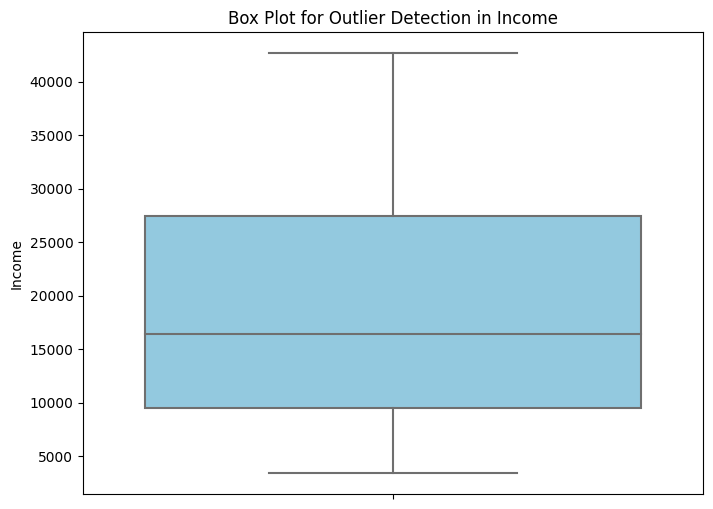

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for outlier detection
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['income'], color='skyblue')

# Add labels and title
plt.title('Box Plot for Outlier Detection in Income')
plt.ylabel('Income')

# Show the plot
plt.show()


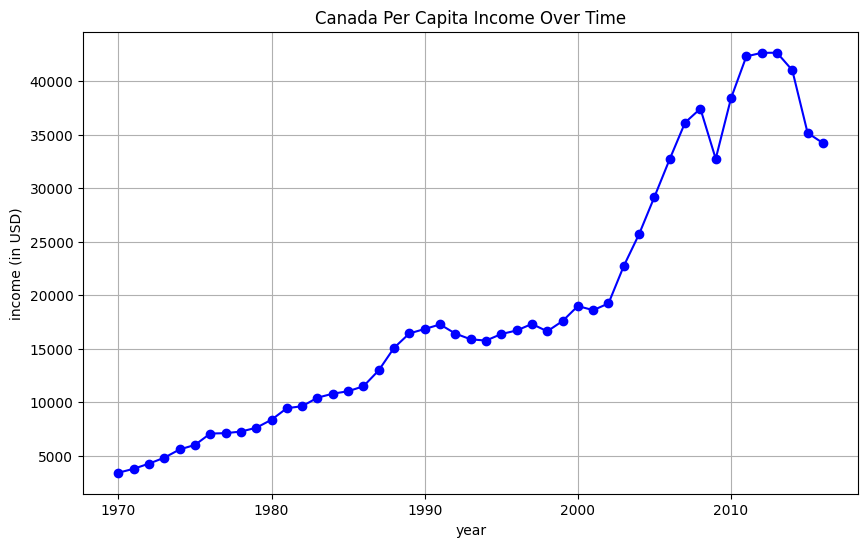

In [16]:
import matplotlib.pyplot as plt

# Plot the per capita income over time
plt.figure(figsize=(10,6))
plt.plot(df['year'], df['income'], marker='o', color='b')
plt.title('Canada Per Capita Income Over Time')
plt.xlabel('year')
plt.ylabel('income (in USD)')
plt.grid(True)
plt.show()


#  Histogram or Density Plot (Income Distribution)

# Analyze the distribution of income values across the years. This can help identify skewness or multimodal patterns.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


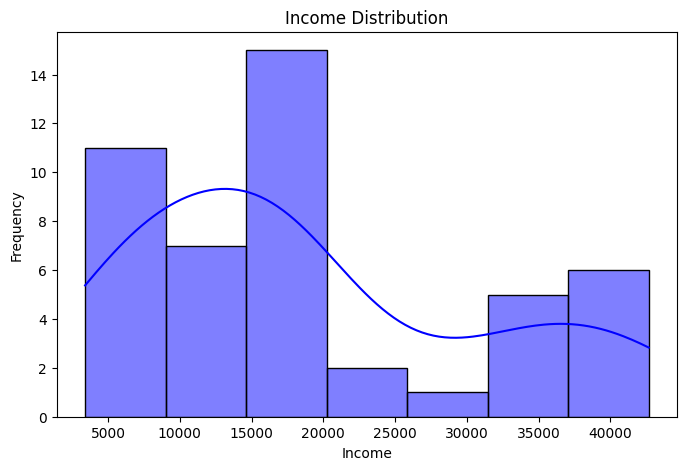

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['income'], kde=True, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


#  Rolling Average Plot

# A rolling mean helps smoothen fluctuations in the data to highlight trends better.



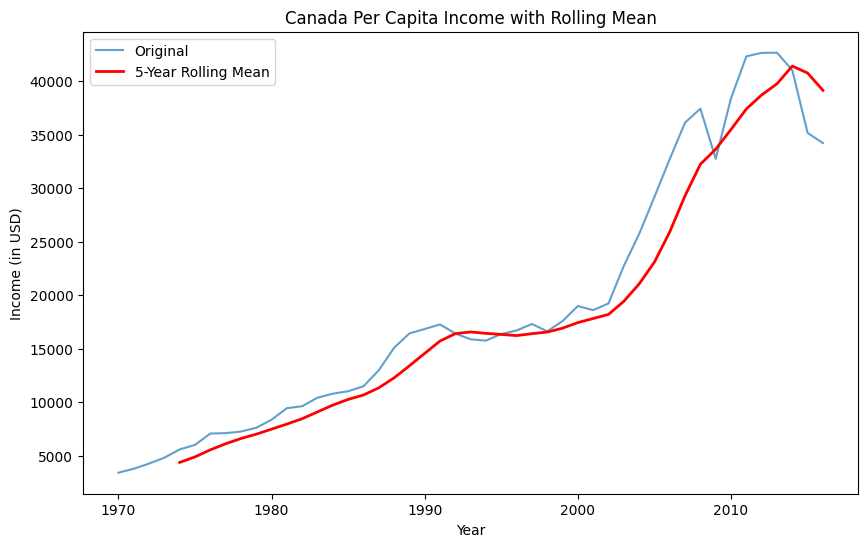

In [28]:
# Rolling Mean
rolling_mean = df['income'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['income'], label='Original', alpha=0.7)
plt.plot(df.index, rolling_mean, label='5-Year Rolling Mean', color='red', linewidth=2)
plt.title('Canada Per Capita Income with Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Income (in USD)')
plt.legend()
plt.show()


# Differencing Plot

# Visualize the first-order differences (change from year to year) to highlight the rate of change.

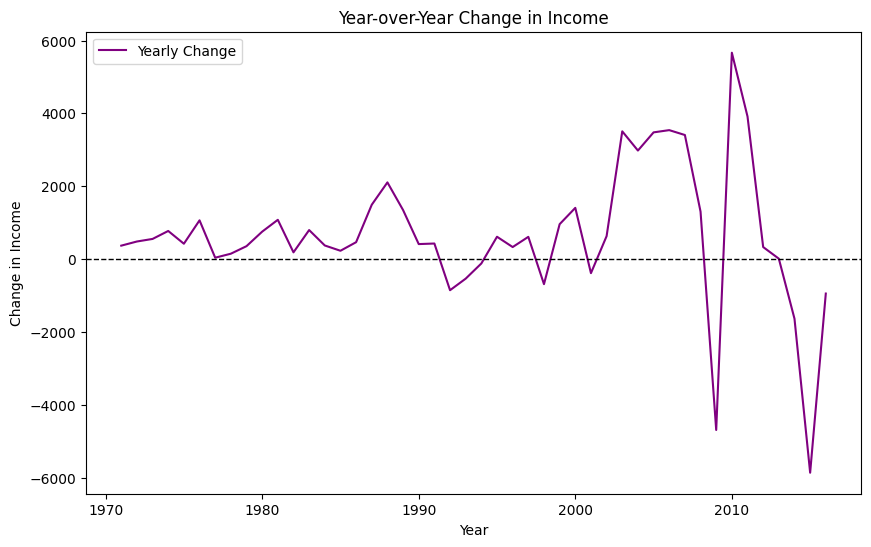

In [29]:
# First Difference
df['income_diff'] = df['income'].diff()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['income_diff'], label='Yearly Change', color='purple')
plt.title('Year-over-Year Change in Income')
plt.xlabel('Year')
plt.ylabel('Change in Income')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()


# Autocorrelation Plot (ACF)

# Understand if past income values are correlated with future values (e.g., seasonality or trends).

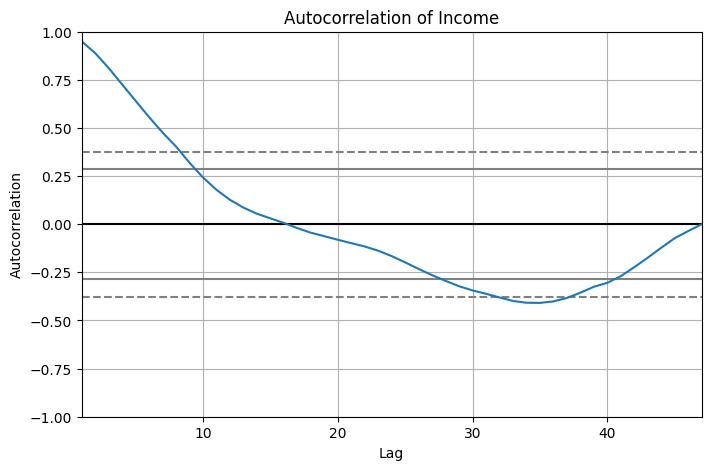

In [30]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation Plot
plt.figure(figsize=(8, 5))
autocorrelation_plot(df['income'])
plt.title('Autocorrelation of Income')
plt.show()


# Heatmap of Yearly Growth 

# Visualize how growth trends compare across decades or groups of years.

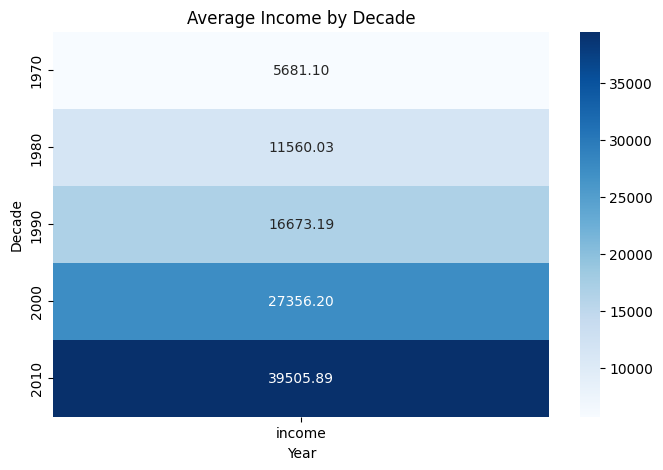

In [32]:
# Decade-wise Income Growth Heatmap
df['decade'] = (df.index // 10) * 10
decade_data = df.groupby('decade')['income'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.heatmap(decade_data.pivot_table(index='decade', values='income'), annot=True, cmap='Blues', fmt='.2f')
plt.title('Average Income by Decade')
plt.xlabel('Year')
plt.ylabel('Decade')
plt.show()


# Seasonal Decomposition Plot

# Break down the time series into trend, seasonal, and residual components.

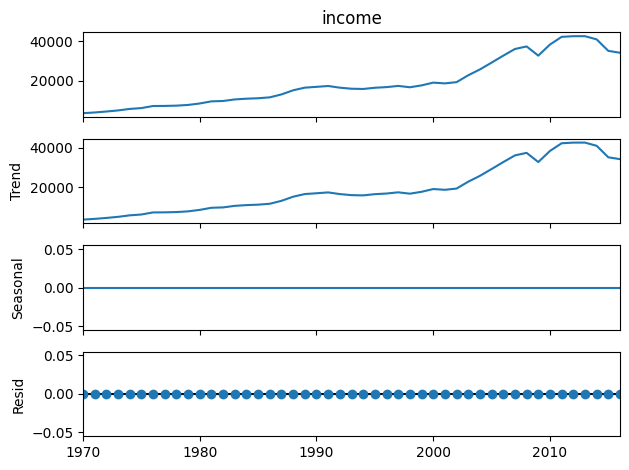

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition
decompose_result = seasonal_decompose(df['income'], model='additive', period=1)

decompose_result.plot()
plt.show()


# Scatter Plot of Year vs Income
# A simple scatter plot can help visualize any non-linear patterns or anomalies in the data.

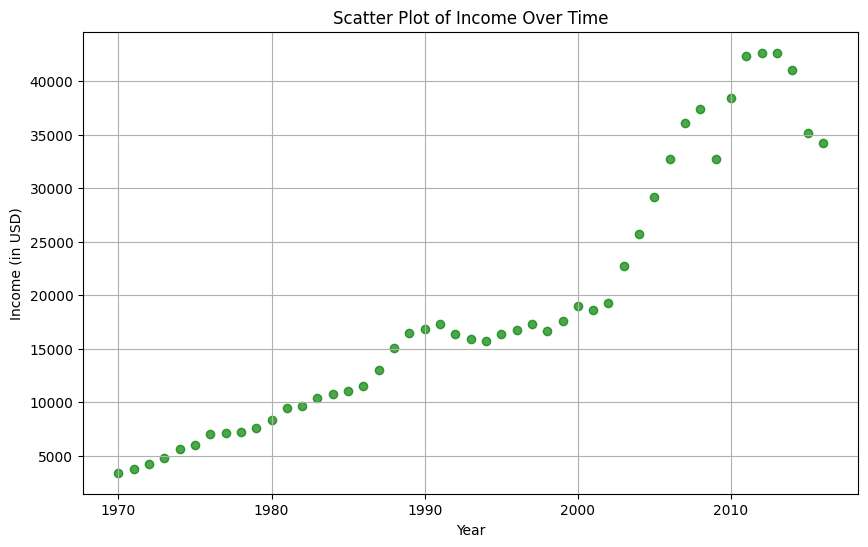

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['income'], color='green', alpha=0.7)
plt.title('Scatter Plot of Income Over Time')
plt.xlabel('Year')
plt.ylabel('Income (in USD)')
plt.grid()
plt.show()



# Lag Plot 

# To Assess relationships between lagged values (e.g., income this year vs. income last year).
.

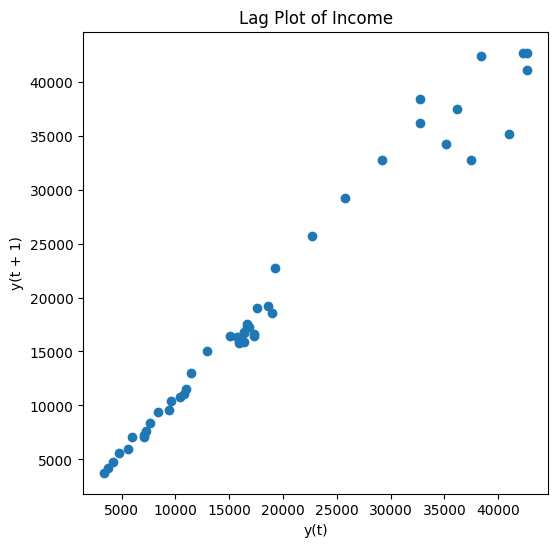

In [35]:
from pandas.plotting import lag_plot

# Lag Plot
plt.figure(figsize=(6, 6))
lag_plot(df['income'])
plt.title('Lag Plot of Income')
plt.show()



# Boxplot of Income by Decade

# Use a boxplot to see income trends and variations grouped by decades.
..

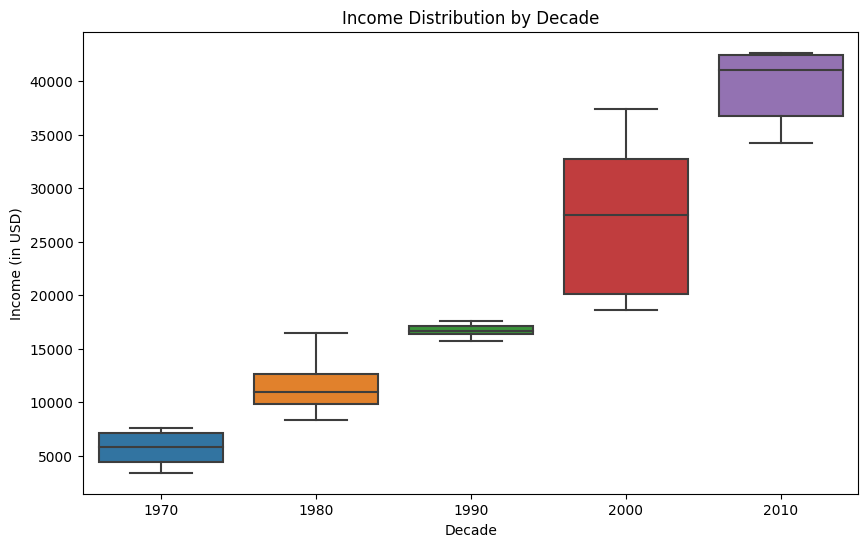

In [37]:
df['decade'] = (df.index // 10) * 10

plt.figure(figsize=(10, 6))
sns.boxplot(x='decade', y='income', data=df.reset_index())
plt.title('Income Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Income (in USD)')
plt.show()


# Line Plot with Annotations#  Highlight specific points or periods of significant changes in the income trend.

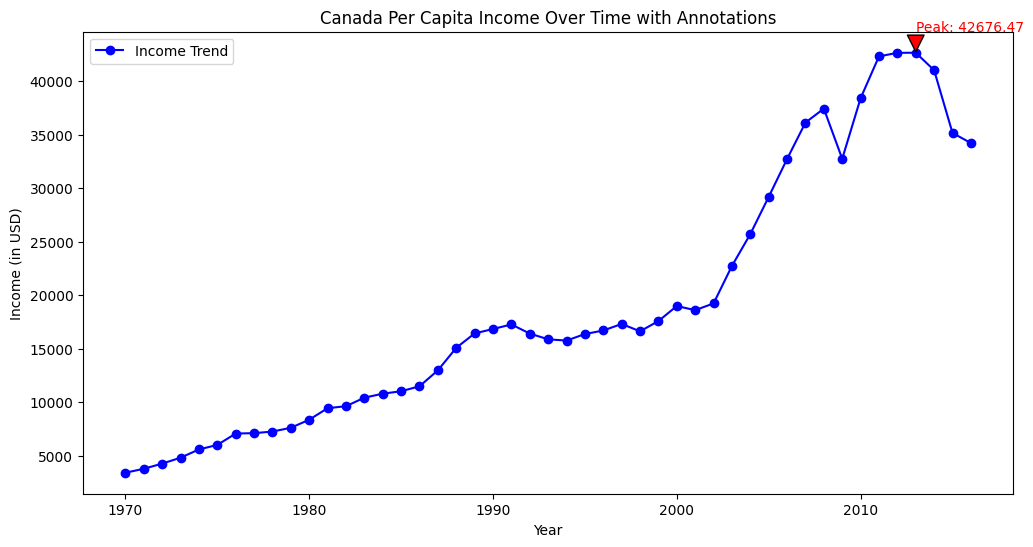

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['income'], label='Income Trend', color='blue', marker='o')

# Annotate specific points
peak_year = df['income'].idxmax()
plt.annotate(f'Peak: {df.loc[peak_year, "income"]:.2f}', xy=(peak_year, df['income'].max()),
             xytext=(peak_year, df['income'].max() + 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.title('Canada Per Capita Income Over Time with Annotations')
plt.xlabel('Year')
plt.ylabel('Income (in USD)')
plt.legend()
plt.show()


# Data Transformation

In [59]:
# Convert 'Year' to datetime
df['Year'] = pd.to_datetime(df['year'], format='%Y')

# Set 'Year' as the index
df.set_index('year', inplace=True)


In [60]:
df.head()

,income,Year
year,,
1970,3399.299037,1970-01-01
1971,3768.297935,1971-01-01
1972,4251.175484,1972-01-01
1973,4804.463248,1973-01-01
1974,5576.514583,1974-01-01


#  Model Building

In [61]:
#split the data
train = df.iloc[:-10]
test = df.iloc[-10:]

ARIMA Forecast:
37    35640.287425
38    38098.512875
39    40180.808288
40    41944.663670
41    43438.777228
42    44704.399879
43    45776.474144
44    46684.598875
45    47453.846448
46    48105.454988
Name: predicted_mean, dtype: float64


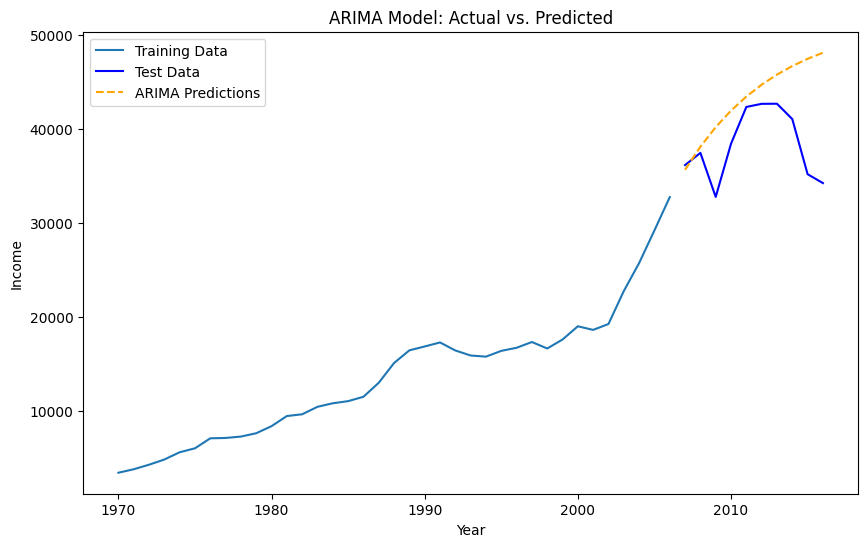

In [68]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Fit the ARIMA model with (p, d, q) parameters
model_arima = ARIMA(train['income'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Forecasting for the length of the test data
predictions_arima = model_arima_fit.forecast(steps=len(test))
print("ARIMA Forecast:")
print(predictions_arima)

# Align predictions with the test index
predictions_arima.index = test.index

# Plot actual vs. predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train['income'], label='Training Data')
plt.plot(test['income'], label='Test Data', color='blue')
plt.plot(predictions_arima, label='ARIMA Predictions', color='orange', linestyle='--')
plt.title('ARIMA Model: Actual vs. Predicted')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.show()


10:03:27 - cmdstanpy - INFO - Chain [1] start processing
10:03:27 - cmdstanpy - INFO - Chain [1] done processing


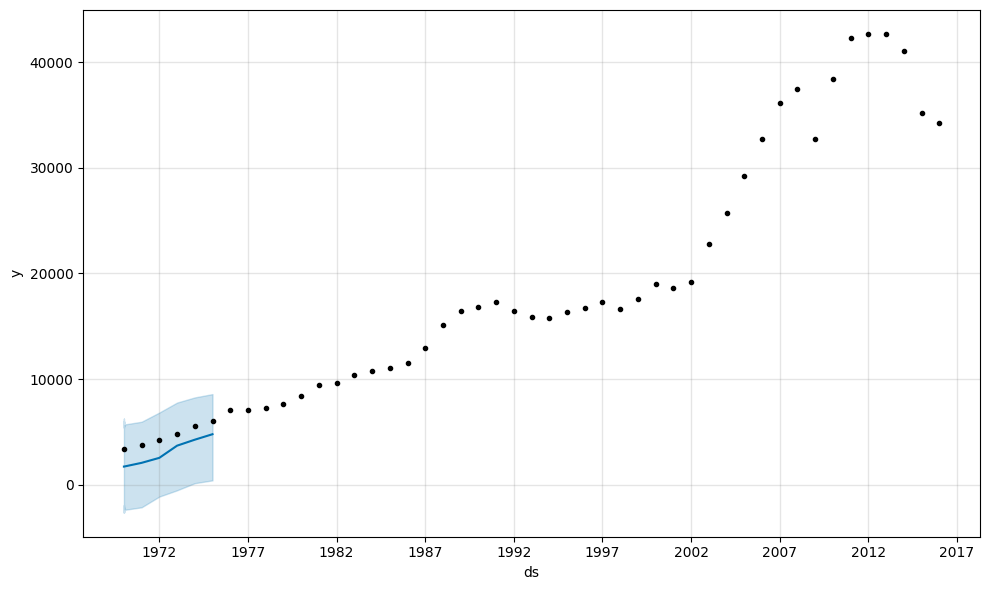

In [72]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data for Prophet
prophet_data = df.reset_index().rename(columns={'year': 'ds', 'income': 'y'})

# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Make future predictions (for the next 5 years)
future = model_prophet.make_future_dataframe(periods=5, freq='Y')
forecast_prophet = model_prophet.predict(future)

# Print forecasted data
#print(forecast_prophet)

# Plot the forecast
model_prophet.plot(forecast_prophet)
plt.show()


#  Evaluation

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assume test contains the actual 'income' values
test = df['income'][-10:]  # Last 10 years as test data

# ARIMA predictions
arima_pred = model_arima_fit.forecast(steps=len(test))

# Prophet predictions
prophet_pred = forecast_prophet['yhat'][-len(test):]

# Calculate MAE and RMSE for ARIMA
mae_arima = mean_absolute_error(test, arima_pred)
rmse_arima = np.sqrt(mean_squared_error(test, arima_pred))

# Calculate MAE and RMSE for Prophet
mae_prophet = mean_absolute_error(test, prophet_pred)
rmse_prophet = np.sqrt(mean_squared_error(test, prophet_pred))

print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}")
print(f"Prophet MAE: {mae_prophet}, RMSE: {rmse_prophet}")


ARIMA MAE: 5014.883262993246, RMSE: 6770.559672803585
Prophet MAE: 35706.060023157515, RMSE: 35925.06856577618


# Save and Deploy Model

In [79]:
import joblib

# Save the ARIMA model
joblib.dump(model_arima_fit, 'arima_model.pkl')

# Save the Prophet model
joblib.dump(model_prophet, 'prophet_model.pkl')


['prophet_model.pkl']

# Model Deployment 

In [80]:
# Load the saved ARIMA model
loaded_arima_model = joblib.load('arima_model.pkl')

# Predict future values with the ARIMA model
future_predictions_arima = loaded_arima_model.forecast(steps=10)

# Load the saved Prophet model
loaded_prophet_model = joblib.load('prophet_model.pkl')

# Predict with Prophet
future_prophet_predictions = loaded_prophet_model.predict(future)


In [82]:
future_predictions_arima

37    35640.287425
38    38098.512875
39    40180.808288
40    41944.663670
41    43438.777228
42    44704.399879
43    45776.474144
44    46684.598875
45    47453.846448
46    48105.454988
Name: predicted_mean, dtype: float64

In [81]:
future_prophet_predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000001970,-2109.007052,-2289.741267,5913.908183,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
1,1970-01-01 00:00:00.000001971,-2109.007052,-2252.043372,5744.960661,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
2,1970-01-01 00:00:00.000001972,-2109.007052,-1935.472634,5991.573609,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
3,1970-01-01 00:00:00.000001973,-2109.007052,-2458.248386,5503.214662,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
4,1970-01-01 00:00:00.000001974,-2109.007052,-2508.041522,5713.812145,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
5,1970-01-01 00:00:00.000001975,-2109.007052,-2423.923089,6192.160377,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
6,1970-01-01 00:00:00.000001976,-2109.007052,-2383.873068,5660.638746,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
7,1970-01-01 00:00:00.000001977,-2109.007052,-2186.161619,5703.956575,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
8,1970-01-01 00:00:00.000001978,-2109.007052,-2241.445300,5483.957202,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
9,1970-01-01 00:00:00.000001979,-2109.007052,-2151.732836,5871.001835,-2109.007052,-2109.007052,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,3814.232833,0.0,0.0,0.0,1705.225780
